# NYC Rats

In [197]:
### data analysis and wrangling
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import random as rnd
from decimal import *
from datetime import datetime  
from datetime import timedelta
%matplotlib notebook

### visualization
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from mpl_toolkits.basemap import Basemap



In [8]:
### Load dataset rat sightings from 09/04/2015 to 02/15/2017
dataset_sightings = pd.read_csv("Rat_Sightings.csv",low_memory=False)
### Load dataset rat interventions from 10/14/2019 to 01/26/2018
dataset_intervention = pd.read_csv("Rodent_Inspection.csv",low_memory=False)


In [9]:
# dataset_sightings.head()
# dataset_intervention.head()

In [10]:
# dataset_sightings.groupby('Descriptor').size()  #check that all sightings are indeed Rat Sighting

In [11]:
# dataset_sightings.info()

In [148]:
### Data cleansing
dataset_sightings['Created Date'] = pd.to_datetime(dataset_sightings['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
dataset_sightings['YearMonth'] = dataset_sightings['Created Date'].map(lambda x: x.strftime('%Y-%m'))
dataset_sightings_locations = dataset_sightings.iloc[:,[1,49,50,52]]

dataset_sightings_locations = dataset_sightings_locations.dropna()

dataset_intervention['INSPECTION_DATE'] = pd.to_datetime(dataset_intervention['INSPECTION_DATE'], format='%m/%d/%Y %I:%M:%S %p')
intervention_types = dataset_intervention.groupby('INSPECTION_TYPE')
intervention_types_numbers = intervention_types.size()
bait_interventions = intervention_types.get_group('BAIT')
bait_interventions = bait_interventions.groupby('RESULT').get_group('Bait applied') ###where bait was actually applied
bait_interventions = bait_interventions.dropna()

bait_interventions['YearMonth'] = bait_interventions['INSPECTION_DATE'].map(lambda x: x.strftime('%Y-%m'))
### getting rid of years that don't overlap with data in the sightings dataset 
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-01']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-07']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-10']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-11']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-12']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2018-12']

<IPython.core.display.Javascript object>


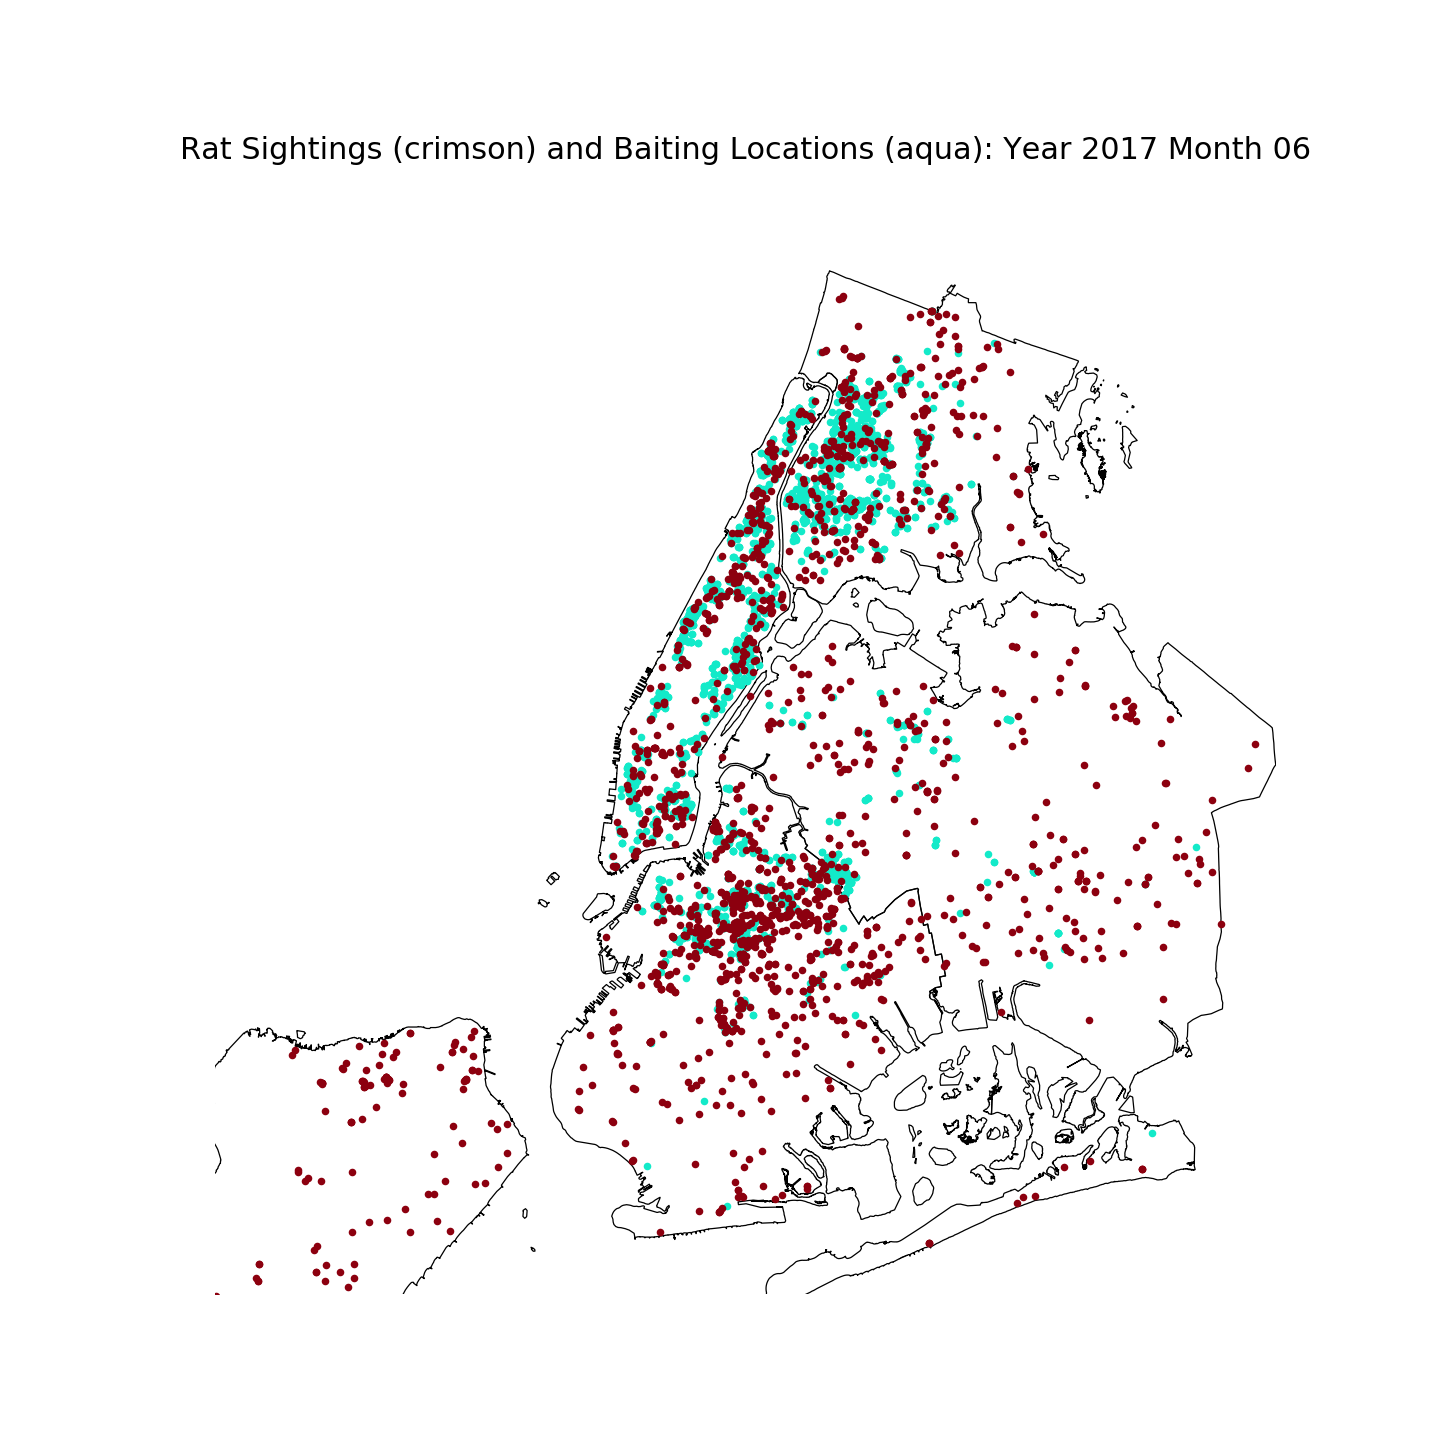

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [149]:
anim_data_sightings = dataset_sightings_locations.groupby('YearMonth') 
anim_data_bait = bait_interventions.groupby('YearMonth')

timepoints = dataset_sightings_locations['YearMonth'].unique()
timepoints.sort()
 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

m = Basemap(llcrnrlat=40.55,urcrnrlat=40.95,llcrnrlon=-74.2, urcrnrlon=-73.7, lat_ts=40.5, resolution='c', projection='merc')
m.readshapefile('geo_export_466a4803-d862-4a61-914b-7783568f80f5', 'comarques')
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

xi,yi = m(0, 0)
pointi = m.plot(xi, yi, 'ro', markersize=2, color = 'xkcd:aqua')[0]

x,y = m(0, 0)
point = m.plot(x, y, 'ro', markersize=2, color = 'xkcd:crimson')[0]



def init():
    pointi.set_data([], [])
    return pointi, point,

def animate(i):
    xi, yi = m(anim_data_bait.get_group(timepoints[i]).LONGITUDE.tolist(), anim_data_bait.get_group(timepoints[i]).LATITUDE.tolist())
    pointi.set_data(xi, yi)
    x, y = m(anim_data_sightings.get_group(timepoints[i]).Longitude.tolist(), anim_data_sightings.get_group(timepoints[i]).Latitude.tolist())
    point.set_data(x, y)
    plt.title('Rat Sightings (crimson) and Baiting Locations (aqua): Year ' + str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].year) + ' Month '+ str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].month).zfill(2))
#     ###frames for makeing a gif:
#     plt.savefig('RatSightingsBaiting'+ str(i).zfill(2) +'.jpg', dpi=200)
    return pointi, point,

anim_bait = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(timepoints)-1, interval=100, blit=True,repeat = False, save_count=len(timepoints))

plt.show()



<IPython.core.display.Javascript object>


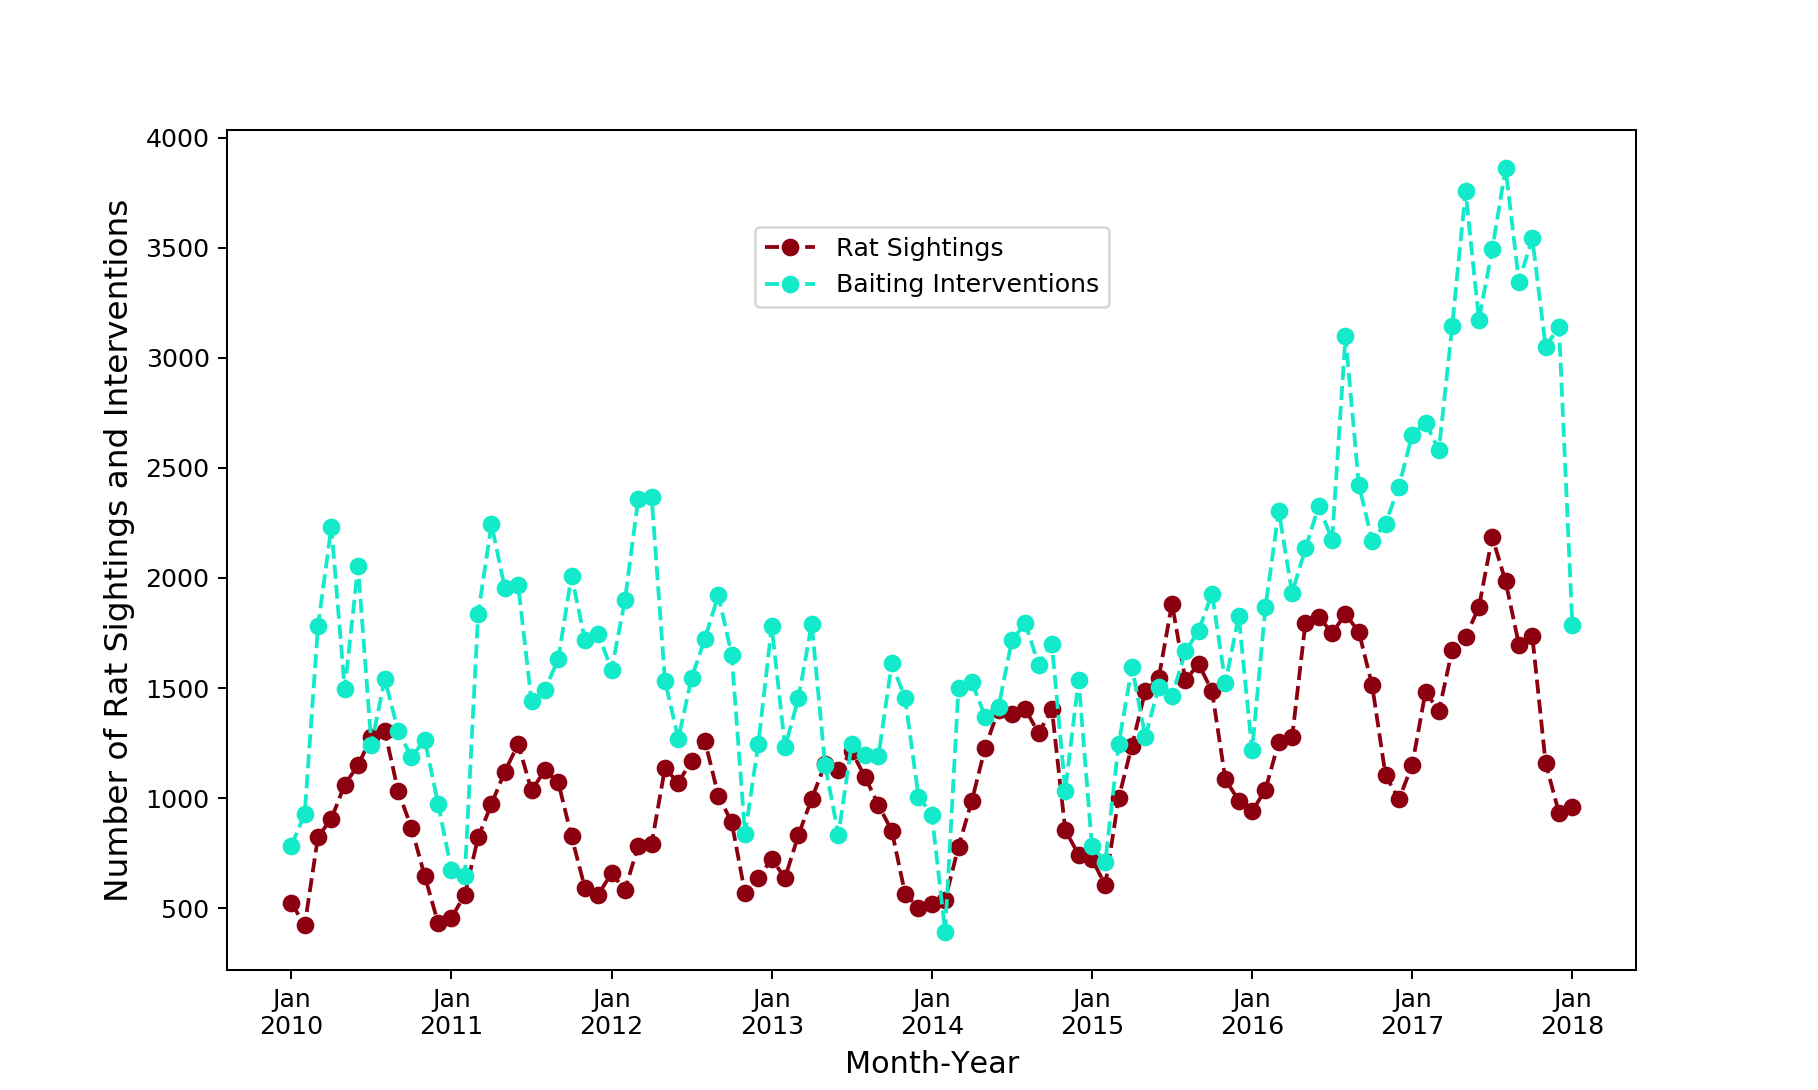

In [152]:
#total number of sightings and baiting interventions as a function of time
fig = plt.figure(figsize=(10, 6))
num_sightings = anim_data_sightings.size().values
num_baitings = anim_data_bait.size().values

plt.plot(timepoints[:-1],num_sightings[:-1],linestyle='--', marker='o',color = 'xkcd:crimson',label="Rat Sightings")
plt.plot(timepoints[:-1],num_baitings,linestyle='--', marker='o',color = 'xkcd:aqua', label="Baiting Interventions")
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Rat Sightings and Interventions", fontsize=13)
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01'],
           ["Jan\n2010","Jan\n2011","Jan\n2012","Jan\n2013","Jan\n2014","Jan\n2015","Jan\n2016","Jan\n2017","Jan\n2018"])
plt.legend(loc=9, bbox_to_anchor=(0.5, 0.9))
plt.savefig('RatSightingsBaiting.jpg', dpi=200)
plt.show()


In [175]:
### making a year-month-day datetime column for baiting dataset
bait_interventions['YearMonthDay'] = bait_interventions['INSPECTION_DATE'].map(lambda x: x.strftime('%Y-%m-%d'))
bait_interventions['YearMonthDay'] = pd.to_datetime(bait_interventions['YearMonthDay'], format='%Y-%m-%d')

### making a year-month-day datetime column for sightings dataset
dataset_sightings_locations['YearMonthDay'] = dataset_sightings_locations['Created Date'].map(lambda x: x.strftime('%Y-%m-%d'))
dataset_sightings_locations['YearMonthDay'] = pd.to_datetime(dataset_sightings_locations['YearMonthDay'], format='%Y-%m-%d')

# intervention_days = bait_interventions['YearMonthDay'].unique()
# bait_interventions.groupby('YearMonthDay').get_group(intervention_days[i])

In [776]:
sighting_days_group = dataset_sightings_locations.groupby('YearMonthDay')
sq_size = 0.004 ### size of area in which I look at rat sightings around a baiting intervention, around 5 blocks

final = pd.DataFrame({'RelativeTime': list(range(-14, 28))})
count = 0

for name, group in bait_interventions.groupby('YearMonthDay'):
    ### sightings_this_time_interval = sightings bewteen 2 weeks before and 4 weeks after time *name*:
    sightings_this_time_interval = dataset_sightings_locations[(dataset_sightings_locations['YearMonthDay'] >= name - timedelta(days=14)) & (dataset_sightings_locations['YearMonthDay'] <= name + timedelta(days=27))]
    
    count += 1
    if count < 2000:
        ### now check over all locations of baiting intervention at time *name*:
        for i in range(0,group.shape[0]):
            bait_locations = group.iloc[i,[13,14]].values ### Longitude and Latitude of baiting intervention i on day *name*
            ### sightings_in_sq = rat sightings in square area around a baiting intervention in 2 weeks before and 4 weeks after time *name*:
            sightings_in_sq = sightings_this_time_interval[(sightings_this_time_interval['Latitude'] >= bait_locations[0] - sq_size/2) & (sightings_this_time_interval['Latitude'] <= bait_locations[0] + sq_size/2)]
            sightings_in_sq = sightings_in_sq[(sightings_in_sq['Longitude'] >= bait_locations[1] - sq_size/2) & (sightings_in_sq['Longitude'] <= bait_locations[1] + sq_size/2)]
            ### sightings_in_sq_day_groups = sightings grouped by day
            sightings_in_sq_day_groups = sightings_in_sq.groupby('YearMonthDay')
            if sightings_in_sq_day_groups.size().sum() > 0:
                ### sightings_in_sq_final = number of sightings grouped by day
                sightings_in_sq_final = sightings_in_sq_day_groups.size().reset_index()
                ### creating relative time in 'RelativeTime' column
                sightings_in_sq_final['RelativeTime'] = sightings_in_sq_final['YearMonthDay'] - name
                sightings_in_sq_final['RelativeTime'] = sightings_in_sq_final['RelativeTime'].map(lambda x: x.days)
                ### final = a dataframe with normalized number of sightings measured in relative time in square around baiting intervention
                final = pd.merge(final, sightings_in_sq_final.iloc[:,1:3], on='RelativeTime', how='left')


<IPython.core.display.Javascript object>


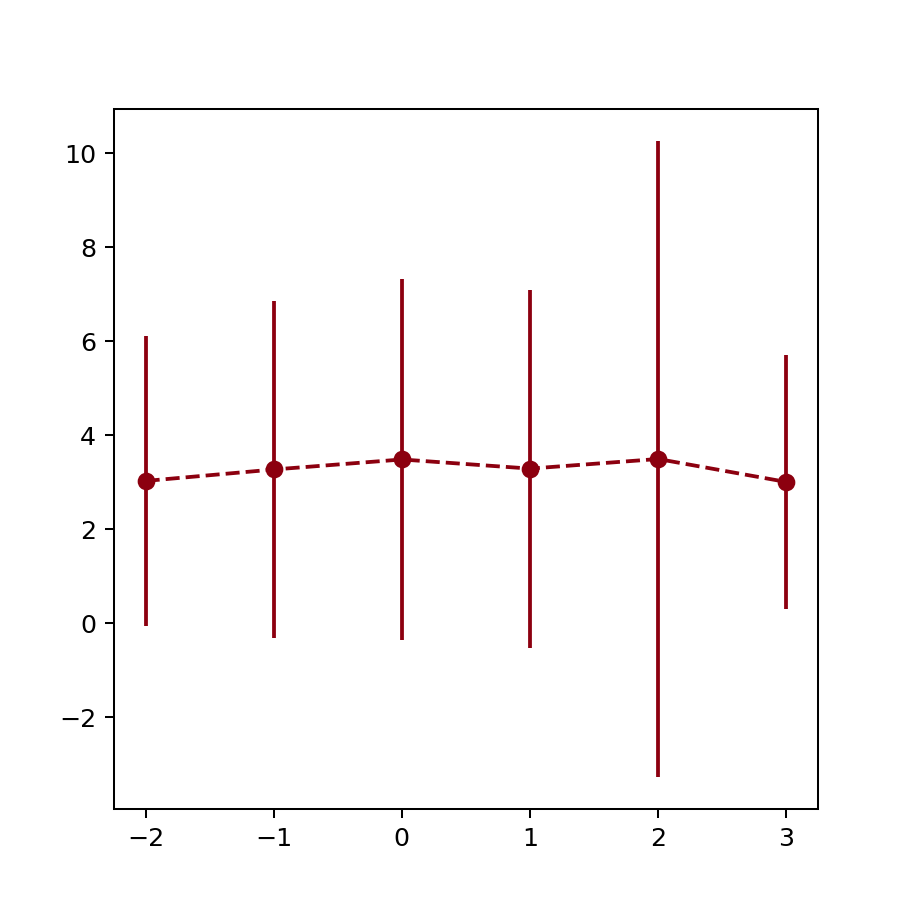

In [781]:
# ### ok_columns = columns with more than 15 entries:
# ok_columns = np.nonzero(final.count().values > 15)
# final_cleaned = final.iloc[:,ok_columns[0]]

### replace nan with 0
final_cleaned = final.fillna(0)
### ok_columns = columns with more than 10 entries:
ok_columns = np.nonzero(final.count().values > 10)
final_cleaned = final_cleaned.iloc[:,ok_columns[0]]

### sum over weeks, there is not enough reporting on the scale of a single day, so:
### create labels for each week: -1 is the week before intervention, 0 is the week of intervention, 1 is 1 week after intervention, etc.
final_cleaned['week_id'] = [-2,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3]
### look at one week before until 2 weeks after:
# final_cleaned = final_cleaned.iloc[7:35,:]


e = []
nums = []
weeks  = [-2,-1,0,1,2,3]
for namefin, groupfin in final_cleaned.groupby('week_id'):
    nums.append(groupfin.sum()[1:groupfin.shape[1]-1].mean())
    e.append(groupfin.sum()[1:groupfin.shape[1]-1].std())
    
fig = plt.figure(figsize=(5, 5))
plt.errorbar(weeks, nums, e, linestyle='--', marker='o', color = 'xkcd:crimson')
plt.show()    
    
# final_cleaned['avg'] = final_cleaned.iloc[:,1:].mean(axis=1)

# ### sum over weeks there is not enough reporting on the scale of a single day:
# ### average over 6 days
# new = np.reshape(final_cleaned['avg'].values[0:-7], (-1, 6))
# new = new.sum(axis=1)
# fig = plt.figure(figsize=(5, 5))
# plt.plot(new, linestyle='--', marker='o')
# plt.show()


# final_cleaned['week_id'] = [-2,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3,4]
# final_over_weeks = final_cleaned.groupby('week_id')['avg'].aggregate([np.sum]).reset_index()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


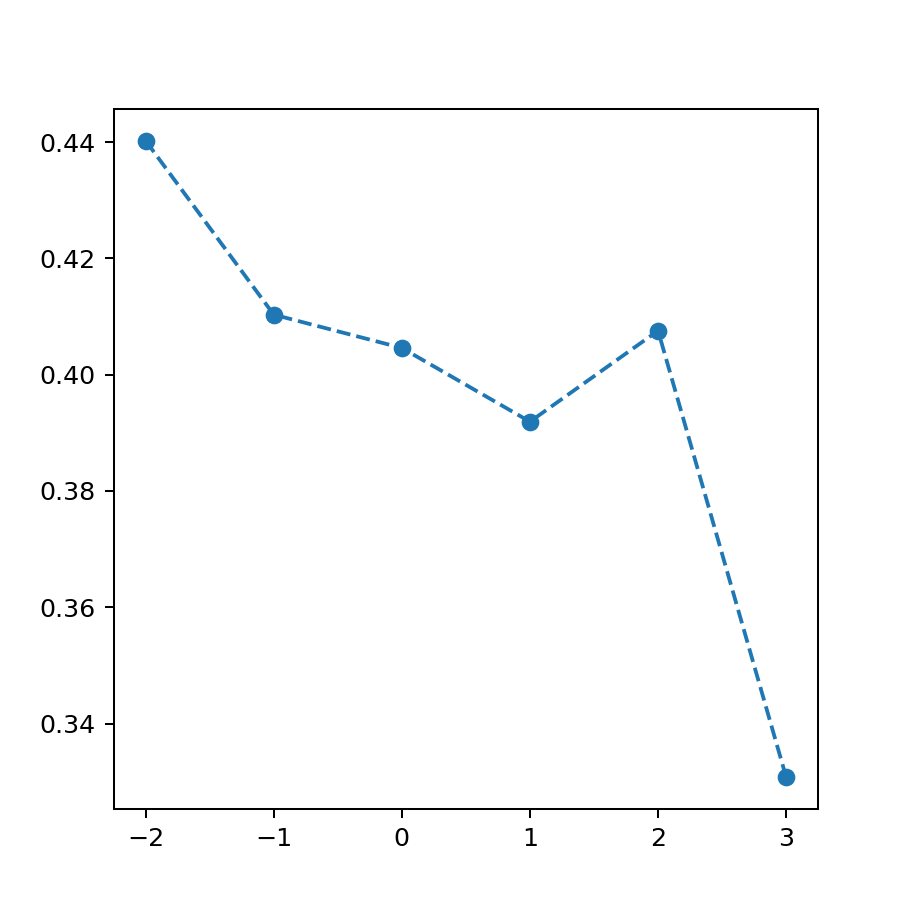

In [759]:
final_cleaned['avg'] = final_cleaned.iloc[:,1:final_cleaned.shape[1]-1].mean(axis=1)
a=final_cleaned['avg'].values[0:7].sum()
b=final_cleaned['avg'].values[7:14].sum()
c=final_cleaned['avg'].values[14:21].sum()
d=final_cleaned['avg'].values[21:28].sum()
e=final_cleaned['avg'].values[28:35].sum()
f=final_cleaned['avg'].values[35:42].sum()
fig = plt.figure(figsize=(5, 5))
plt.plot([-2,-1,0,1,2,3],[a,b,c,d,e,f], linestyle='--', marker='o')
plt.show()

In [714]:
groupfin.sum()[1:groupfin.shape[1]-1].std()

0.08227892661252455

<IPython.core.display.Javascript object>


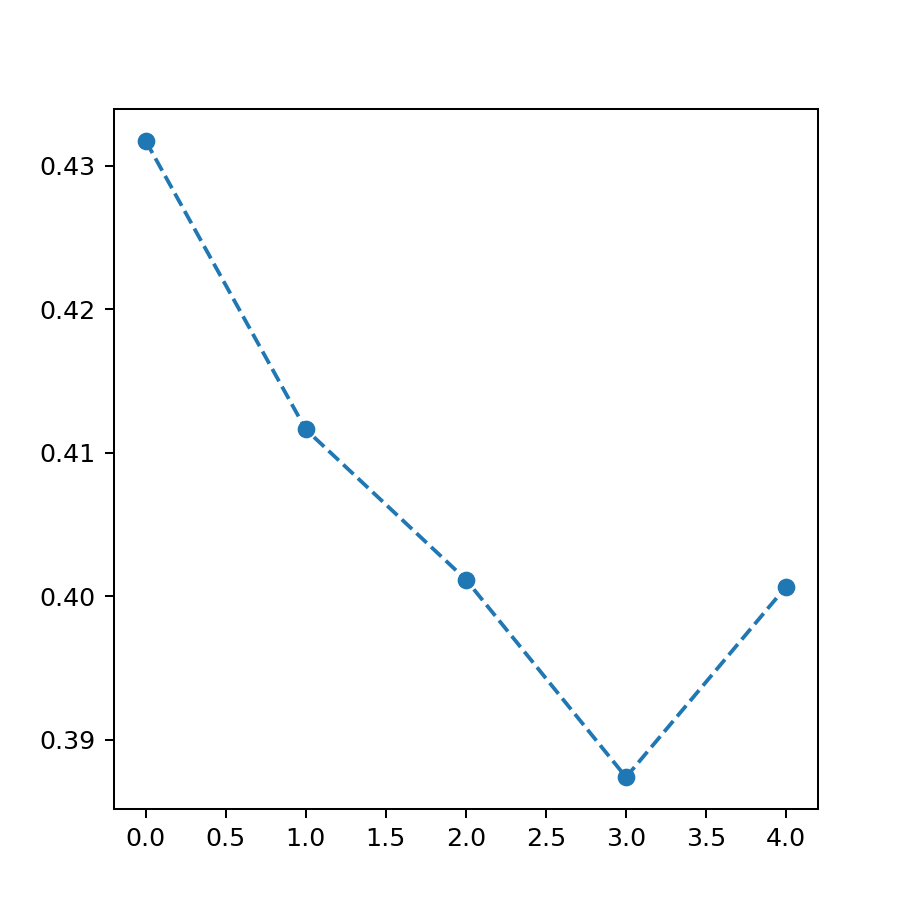

In [673]:
### average over 6 days
new = np.reshape(final_cleaned['avg'].values[0:-8], (-1, 7))
new = new.sum(axis=1)
fig = plt.figure(figsize=(5, 5))
plt.plot(new, linestyle='--', marker='o')
plt.show()

<IPython.core.display.Javascript object>


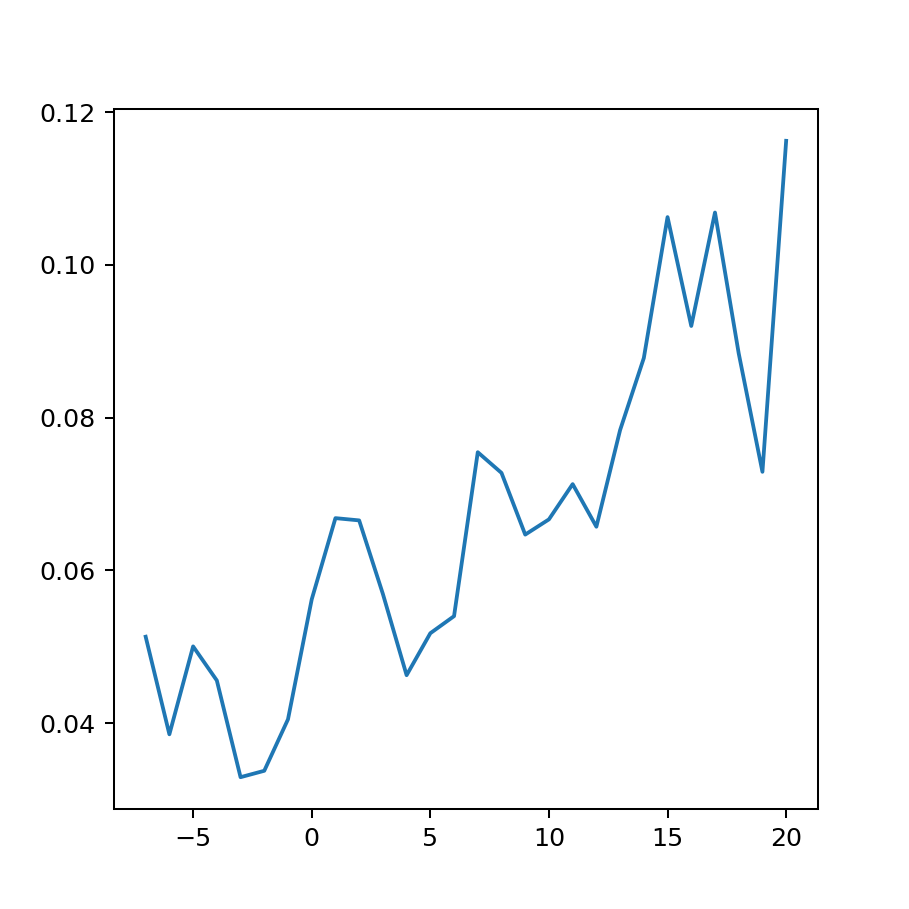

In [746]:
fig = plt.figure(figsize=(5, 5))
final_cleaned['avg'] = final_cleaned.iloc[:,1:final_cleaned.shape[1]].mean(axis=1)
plt.plot(final_cleaned['RelativeTime'].values,final_cleaned['avg'].values)
plt.show()

<IPython.core.display.Javascript object>


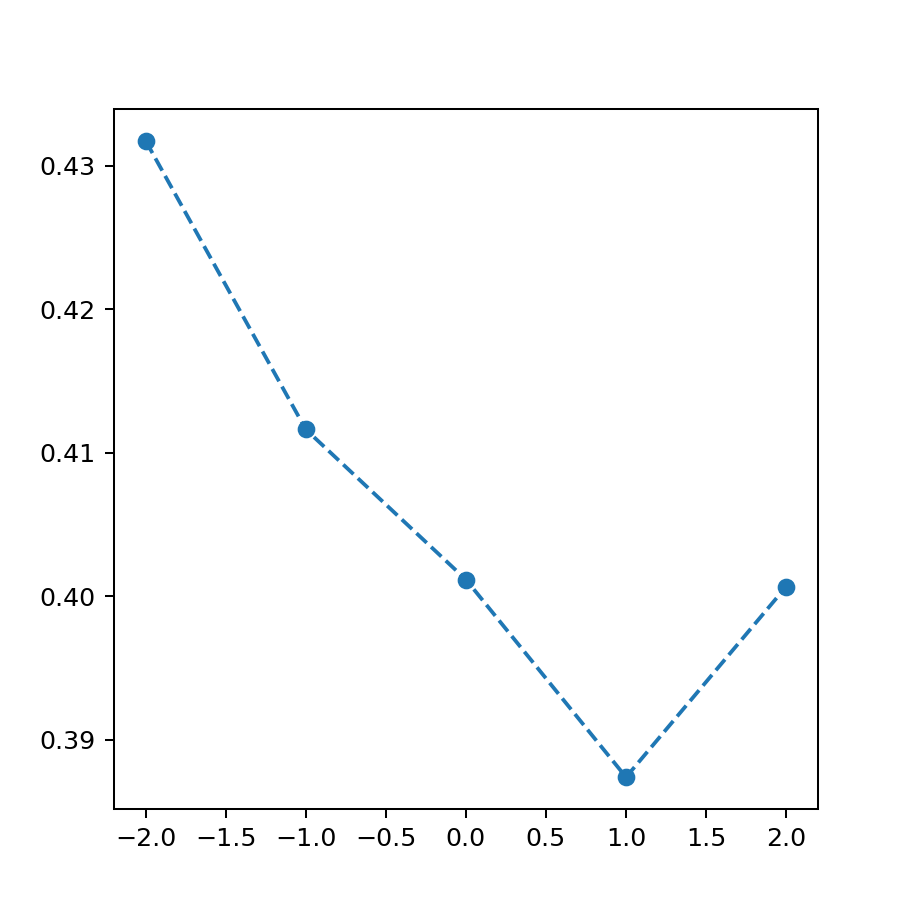

In [663]:
fig = plt.figure(figsize=(5, 5))
plt.plot(final_over_weeks['week_id'].values[:-2],final_over_weeks['sum'].values[:-2],linestyle='--', marker='o')
plt.show()


<IPython.core.display.Javascript object>


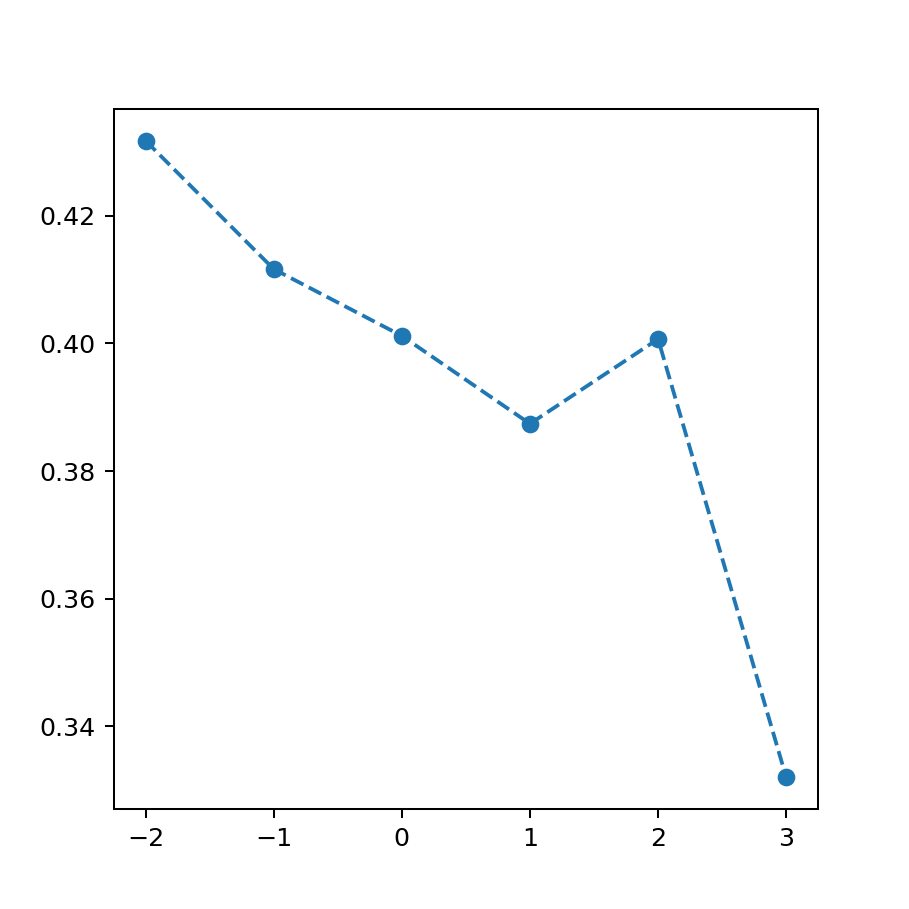

In [658]:
a=final_cleaned['avg'].values[0:7].sum()
b=final_cleaned['avg'].values[7:14].sum()
c=final_cleaned['avg'].values[14:21].sum()
d=final_cleaned['avg'].values[21:28].sum()
e=final_cleaned['avg'].values[28:35].sum()
f=final_cleaned['avg'].values[35:42].sum()
fig = plt.figure(figsize=(5, 5))
plt.plot([-2,-1,0,1,2,3],[a,b,c,d,e,f], linestyle='--', marker='o')
plt.show()

<IPython.core.display.Javascript object>


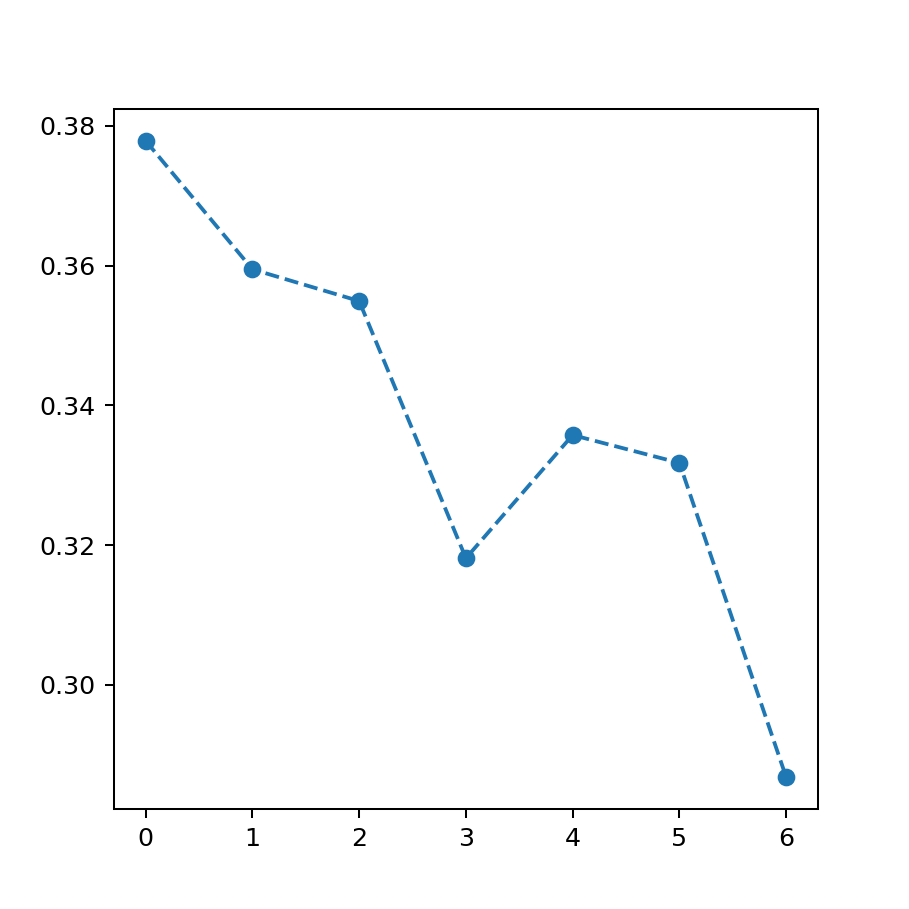

In [629]:
new = np.reshape(final_cleaned['avg'].values[0:-1], (-1, 6))
new = new.sum(axis=1)
fig = plt.figure(figsize=(5, 5))
plt.plot(new, linestyle='--', marker='o')
plt.show()

<IPython.core.display.Javascript object>


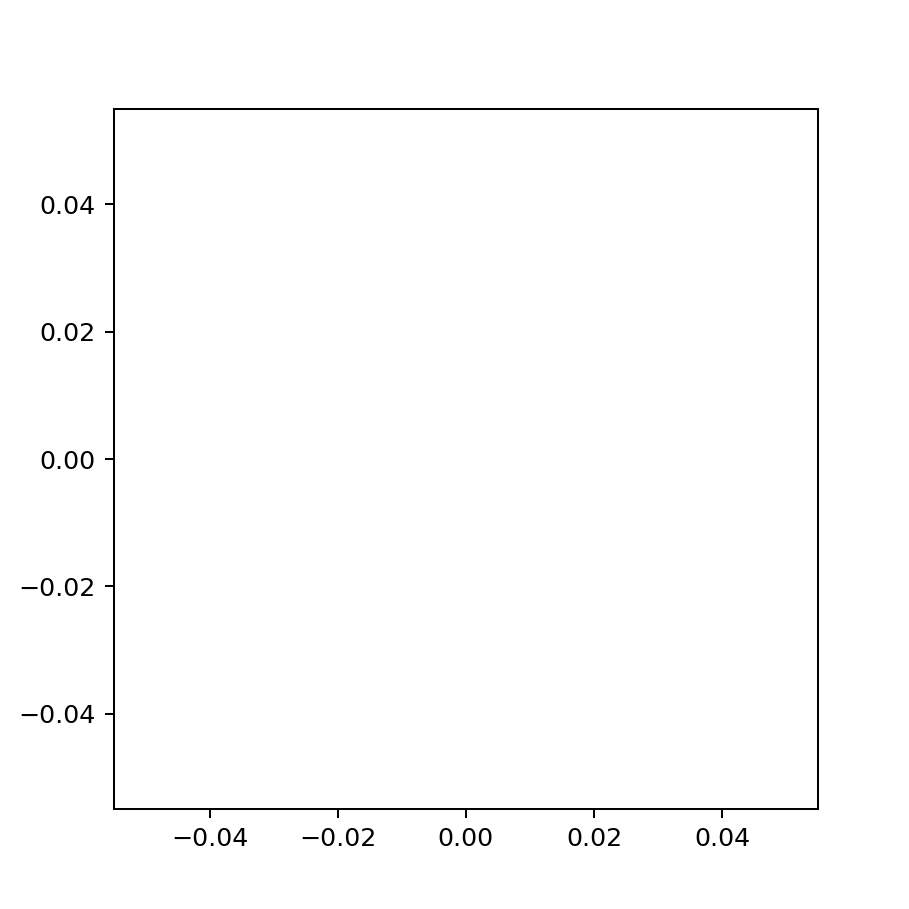

In [733]:
### ok_columns = columns with more than 15 entries:
ok_columns = np.nonzero(final.count().values > 10)
final_cleaned = final.iloc[7:35,ok_columns[0]]
final_cleaned['avg'] = final_cleaned.iloc[:,1:10].mean(axis=1)

a=final_cleaned['avg'].values[0:7].sum()
b=final_cleaned['avg'].values[7:14].sum()
c=final_cleaned['avg'].values[14:21].sum()
d=final_cleaned['avg'].values[21:28].sum()

fig = plt.figure(figsize=(5, 5))
plt.plot([-2,-1,0,1],[a,b,c,d], linestyle='--', marker='o')
plt.show()

In [778]:
final_cleaned

,RelativeTime,0_y,0_x,0_y,0_x,0_y,0_x,0_y,0_x,0_y,...,0_x,0_x,0_y,0_y,0_x,0_x,0_y,0_x,0_y,week_id
0,-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,-2
1,-13,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,2.0,2.0,1.0,1.0,-2
2,-12,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,-2
3,-11,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,-2
4,-10,NaN,NaN,NaN,5.0,7.0,7.0,6.0,6.0,6.0,...,NaN,NaN,NaN,NaN,1.0,2.0,2.0,3.0,3.0,-2
5,-9,NaN,NaN,7.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,1.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,-2
6,-8,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,-2
7,-7,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,7.0,7.0,3.0,3.0,-1
8,-6,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1
9,-5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,-1


In [784]:
final_cleaned

,RelativeTime,0_y,0_y,0_x,0_y,0_x,0_y,0_y,0_x,0_x,...,0_x,0_y,0_y,0_x,0_x,0_x,0_y,0_x,0_y,week_id
0,-14,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,-2
1,-13,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-2
2,-12,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2
3,-11,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-2
4,-10,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,-2
5,-9,0.0,0.0,0.0,0.0,1.0,7.0,4.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
6,-8,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,-2
7,-7,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-1
8,-6,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-1
9,-5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1


In [780]:
groupfin.sum()

RelativeTime    168.0
0_y               5.0
0_x               5.0
0_y               0.0
0_x               0.0
0_y               1.0
0_x               1.0
0_y               1.0
0_x               1.0
0_y               0.0
0_x               0.0
0_y               4.0
0_x               4.0
0_x               4.0
0_y               4.0
0_x               2.0
0_y               2.0
0_y               3.0
0_x               3.0
0_y               3.0
0_x               3.0
0_y               3.0
0_x               3.0
0_y               3.0
0_x               3.0
0_y               3.0
0_x               3.0
0_y               2.0
0_y               3.0
0_y               1.0
                ...  
0_x               4.0
0_y               4.0
0_y               1.0
0_x               3.0
0_x               2.0
0_x               7.0
0_y               6.0
0_x               7.0
0_x              11.0
0_y               3.0
0_x               2.0
0_x               3.0
0_y               3.0
0_x               6.0
0_y       